In [67]:
# this reads a multiple set of readings from a file called testpulsemulti50avg.txt

# set up the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
# Function to read the file
import numpy

def readmeasurements(fname):
    measurements = [ ]
    samplespersecond = 0
    for fline in open(fname):
        sfline = fline.split()
        samplespersecond = max(samplespersecond, len(sfline))
        measurements.extend(tuple(map(int, v.split(",")))  for v in sfline)
    return samplespersecond, numpy.array(measurements)


In [86]:
# Reading the file and saying how many sensors 
samplespersecond, measurements = readmeasurements("testpulsemulti50avg.txt")
totalseconds = measurements.shape[0]/samplespersecond
print("seconds:", totalseconds)
print("adc sensors:", measurements.shape[1])
print("samples per second:", samplespersecond)


seconds: 85.0
adc sensors: 3
samples per second 50


In [109]:
# plot function which rescales the range according to the range it works in
def plotsensor(measurementcol, t0, t1, label):
    lm = measurementcol[int(t0*samplespersecond):int(t1*samplespersecond)]
    print(lm.std())
    lm = (lm - lm.mean())/max(10, lm.std())
    plt.plot(numpy.arange(t0, t1, 1/samplespersecond), lm, label=label)
    return lm


2.16992802976
30.1171573265
16.3378170716


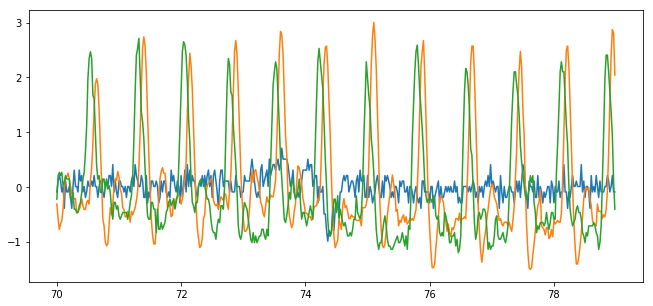

In [116]:
# actually plot the sensors

# Set the size of the image
plt.figure(figsize=(11, 5))

# Set 
t0, t1 = 70, 79

# Pick which and lines to 
lm0 = plotsensor(measurements[:,0], t0, t1, "label0")
lm1 = plotsensor(measurements[:,1], t0, t1, "label1")
lm2 = plotsensor(measurements[:,2], t0, t1, "label2")

#plt.legend()

#help(plt.savefig)
plt.savefig("thing.png")

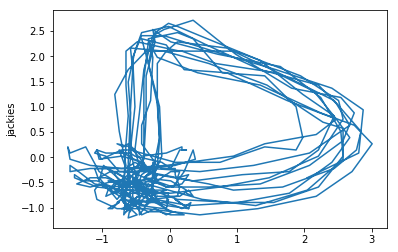

In [108]:
plt.plot(lm1, lm2)
plt.ylabel("jackies")

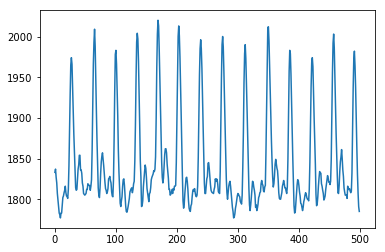

In [41]:
t0, t1 = 75, 85
lm = measurements[int(t0*samplespersecond):int(t1*samplespersecond), 1]
plt.plot(lm)
    

In [77]:
import scipy.signal

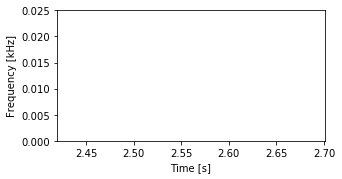

In [80]:
lm = measurements[int(t0*samplespersecond):int(t1*samplespersecond), 2]
freqs, times, Sx = scipy.signal.spectrogram(lm, fs=50, window='hanning') #,
                                      #nperseg=1024, noverlap=M - 100,
                                      #detrend=False, scaling='spectrum')



f, ax = plt.subplots(figsize=(4.8, 2.4))
ax.pcolormesh(times, freqs / 1000, 10 * numpy.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');

/home/julian/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


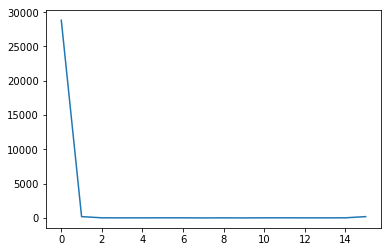

In [56]:
plt.plot(numpy.fft.fft(lm[:16]))
    